# Метод ближайших соседей

**KNN (k Nearest Neighbor или k Ближайших Соседей) — очень популярный алгоритм машинного обучения с учителем.**

Алгоритм достаточно быстрый, но требует большого объема памяти.

**KNN может быть применен как для решения задач классификации, так и для решения задачи регрессии.**

**Краткий алгоритм работы KNN:**
1. Пусть имеется набор данных, состоящий из $N$ объектов $X_i(i=1,...n)$ для каждого которых задан класс $C_i$.
2. Выбираем число $K$ - количество соседей. $K$ - любое целое число.
3. Далее вычисляется расстояние от каждого объекта  $X_i$  до каждого из объектов  $X$  обучающей выборки.
*Методы расчета расстояния: Евклидово, Манхэттенское или Хэмминговское расстояние.*
4. Выбирается  $K$  объектов, расстояние до которых минимально;
5. Далее объект относится к классу, к которому относится большинство из выбранных $K$ ближайших соседей:

$$a(u) = \underset{y}{\text{argmax}}\sum_{i=1}^{k}[y_{u}^{(i)}=y],$$

то есть провести голосование.


Под задачу регрессии метод адаптируется довольно легко – на 5 шаге возвращается не метка, а число – среднее (или медианное) значение целевого признака среди соседей.

Евклидова метрика

$$\rho(x, y) = \sqrt{\sum_{i=1}^{n}(x_{i}-y_{i})^{2}}$$

Манхэттенская метрика

$$\rho(x, y) = \sum_{i=1}^{n}|x_{i}-y_{i}|$$

Метрика Минковского:

$$\rho(x, y) = \left ( \sum_{i=1}^{n}|x_{i}-y_{i}|^{q} \right )^{\frac{1}{q}}.$$

При этом при $q = 1$ получаем манхэттенскую ($L_{1}$) метрику, при $q = 2$ - евклидову ($L_{2}$) метрику.

**Пример.**

Пусть $K = 5$.

$X_i$ - серая точка.

Хотим определить к какому классу она относится.


SimpleKnnExample.png

## Вычислительная сложность алгоритма

Чтобы вычислить вычислительную сложность KNN, давайте рассмотрим $d$ - мерное пространство, $k$ — количество соседей, а $n$ — общее количество точек обучающих данных.

Чтобы понять, как мы можем рассчитать сложность этого алгоритма, взгляните на формальный псевдокод! Каждое вычисление расстояния требует $O(d)$ времени выполнения, поэтому расчет для одной точки до всех других требует $O(nd)$ работы. Для каждой итерации на третьем шаге мы выполняем $O(n)$ работы, перебирая наблюдения обучающего набора, поэтому в целом шаг требует $O(nk)$ работы. Первый шаг требует только $O(n)$ работы, поэтому мы получаем время выполнения $O(nd + kn)$.

# Практика

Датасет: https://www.kaggle.com/uciml/pima-indians-diabetes-database

**Чтобы сказать датасет напрямую с kaggle:**

https://www.geeksforgeeks.org/how-to-import-kaggle-datasets-directly-into-google-colab/

In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od
import pandas

od.download("https://www.kaggle.com/uciml/pima-indians-diabetes-database")

Dataset URL: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database


100%|██████████| 8.91k/8.91k [00:00<00:00, 3.21MB/s]

In [ ]:
import pandas as pd

df = pd.read_csv("/content/pima-indians-diabetes-database/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


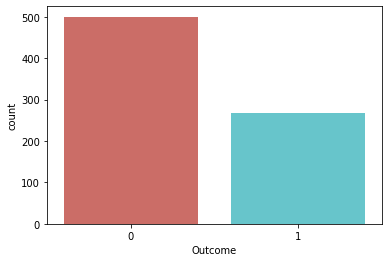

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

sns.countplot(df['Outcome'], ax=ax, palette='hls')
plt.show()

In [ ]:
X = df.drop(['Outcome'], axis = 1)
y = df['Outcome']

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_st = scaler.fit_transform(X)

pd.DataFrame(X_st, columns = X.columns)

# X - вектор признаков исходного набора
# X_st - вектор стандартизированных признаков

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_st, y, test_size=1/3, random_state=42)

print(f'Train shape: {X_train.shape}, {y_train.shape}')
print(f'Test shape: {X_test.shape}, {y_test.shape}')

Train shape: (512, 8), (512,)
Test shape: (256, 8), (256,)


Метод ближайщих соседей, реализован в библиотеке sklearn в модуле neighbors.

Для использования необходимо явным образом указывать сколько соседей необходимо учитывать (если не указывать по умолчанию будет 5)

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

`sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)`

1. `n_neighbors` - количество соседей
2. `weights` - функция для весов:
-  `uniform` - однородные веса. Все точки в каждой окрестности имеют одинаковый вес.
- `distance` - точки веса обратно пропорциональны их расстоянию. в этом случае более близкие соседи точки запроса будут иметь большее влияние, чем соседи, которые находятся дальше.
3. `algorithm` - Алгоритм, используемый для вычисления ближайших соседей.
4. `metric` - метод расчета расстояния (евклидово, манххэтонское и т.д.)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier # классификатор
from sklearn.neighbors import KNeighborsRegressor # регрессор

from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score

# создаем модель
# как подобрать лучшее число соседей?
scores = []

for i in range(1,15):
    score = {}
    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    answers = knn.predict(X_test) # метод predict возвращает вектор ответов для X_test

    score['k'] = i
    score['accuracy'] = accuracy_score(answers,y_test)
    score['recall'] = recall_score(answers,y_test)
    score['presicion'] = precision_score(answers,y_test)

    scores.append(score)

scores = pd.DataFrame(scores)
scores

,k,accuracy,recall,presicion
0,1,0.621094,0.435294,0.430233
1,2,0.675781,0.536585,0.255814
2,3,0.703125,0.565789,0.500000
3,4,0.699219,0.581818,0.372093
4,5,0.687500,0.537500,0.500000
5,6,0.699219,0.571429,0.418605
6,7,0.726562,0.595238,0.581395
7,8,0.699219,0.569231,0.430233
8,9,0.703125,0.562500,0.523256
9,10,0.703125,0.573529,0.453488


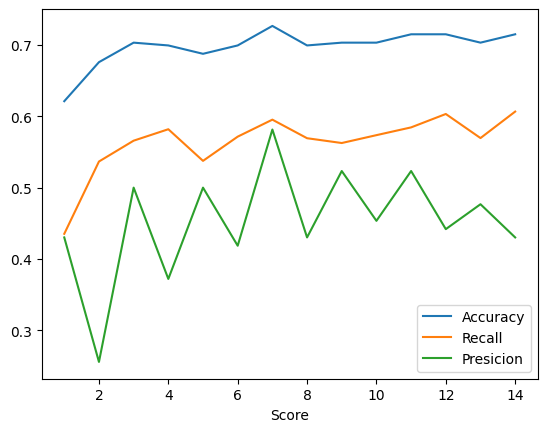

In [ ]:
import matplotlib.pyplot as plt

plt.plot(scores['k'], scores['accuracy'], label='Accuracy')
plt.plot(scores['k'], scores['recall'], label='Recall')
plt.plot(scores['k'], scores['presicion'], label='Presicion')
plt.xlabel('K')
plt.xlabel('Score')
plt.legend()

In [ ]:
knn = KNeighborsClassifier(7)

# обучаем
knn.fit(X_train,y_train)

# предсказываем значения
y_pred = knn.predict(X_test)

confusion_matrix(y_test,y_pred)

# 0 - общее 133+43
# 1 - общее37+43

array([[136,  34],
       [ 36,  50]])

In [ ]:
print(accuracy_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.7265625
0.5813953488372093
0.5952380952380952


# Балансировка

В машинном обучении балансировка классов означает балансировку классов с несбалансированными выборками. Перед использованием алгоритма машинного обучения важно избежать дисбаланса классов, потому что наша конечная цель – обучить модель машинного обучения, которая хорошо обобщается для всех возможных классов, предполагая, что у нас есть двоичный набор данных с равным количеством выборок.

Ребалансировка классов может происходить путём увеличения числа примеров миноритарного класса (**oversampling**), либо путём сокращения числа примеров мажоритарного (**undersampling**). Возможно также и сочетание обоих подходов.

**Сокращение числа примеров мажоритарного класса**

В данном случае можно рандомно удалить некоторое число объектов из мажоритарного класса до достижения баланса. Либо использовать существующие алгоритмы: Nearmiss1/2, Tomek links, Edited nearest neighbors (ENN)

`from imblearn.under_sampling import NearMiss`

`from imblearn.under_sampling import RandomUnderSampler`

**Увеличение числа примеров миноритарного класса**

**Дублирование** примеров миноритарного класса (Oversampling). Самый простой метод – это дублирование примеров миноритарного класса. В зависимости от того, какое соотношение классов необходимо получить в выборке, выбирается случайным образом соответствующее количество наблюдений для дублирования.

Такой подход к восстановлению баланса не всегда является наиболее эффективным, поэтому был предложен специальный метод увеличения числа наблюдений миноритарного класса – алгоритм SMOTE (Synthetic Minority Oversampling Technique).

**Алгоритм SMOTE**. В основе алгоритма лежит идея генерации некоторого количества искусственных наблюдений, которые были бы «похожи» на наблюдения, имеющиеся в миноритарном классе, но при этом не дублировали их.

Подробнее о различных алгоритмах балансировки можно найти в библиотеке `imbalanced-learn`.

https://imbalanced-learn.org/stable/index.html

In [ ]:
X = df.drop(['Outcome'], axis = 1)
y = df['Outcome']

print(f'Features shape: {X.shape}')
print(f'Classes distribution:\n{y.value_counts()}')

Features shape: (768, 8)
Classes distribution:
0    500
1    268
Name: Outcome, dtype: int64


In [ ]:
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0, k_neighbors=10)

columns = X.columns

os_data_X, os_data_y = os.fit_resample(X, y)
# fit()
# resample()

os_data_X = pd.DataFrame(os_data_X, columns = columns)
os_data_y = pd.DataFrame(os_data_y, columns = ['Outcome'])

In [ ]:
print(f'Features shape after SMOTE: {os_data_X.shape}')
print(f'Classes distribution after SMOTE:\n{os_data_y.value_counts()}')

Features shape after SMOTE: (1000, 8)
Classes distribution after SMOTE:
Outcome
0          500
1          500
dtype: int64


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_st = scaler.fit_transform(os_data_X)

pd.DataFrame(X_st, columns = X.columns)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.572239,0.720210,0.136488,0.899607,-0.703671,0.123659,0.431976,1.366717
1,-0.930490,-1.246128,-0.173243,0.527894,-0.703671,-0.804922,-0.420717,-0.287272
2,1.173331,1.812621,-0.276487,-1.268718,-0.703671,-1.242681,0.571001,-0.200220
3,-0.930490,-1.121281,-0.173243,0.156181,0.116560,-0.605940,-0.989178,-1.157792
4,-1.231036,0.376882,-1.515414,0.899607,0.762274,1.383875,5.563576,-0.113168
...,...,...,...,...,...,...,...,...
995,2.074969,0.782634,-0.018377,1.209368,1.643587,1.215052,0.723555,0.235040
996,1.473877,1.313233,0.239732,-1.268718,-0.703671,0.840647,0.074491,-0.113168
997,-0.028852,-0.247353,-0.586219,-1.268718,-0.703671,0.249240,-0.928948,-0.200220
998,0.572239,-0.653105,0.497842,0.837655,-0.703671,0.013465,0.741148,0.757353


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_st, os_data_y, test_size=1/3, random_state=42)

print(f'Train shape: {X_train.shape}, {y_train.shape}')
print(f'Test shape: {X_test.shape}, {y_test.shape}')

Train shape: (666, 8), (666, 1)
Test shape: (334, 8), (334, 1)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier # классификатор
from sklearn.neighbors import KNeighborsRegressor # регрессор

from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score

# создаем модель
# как подобрать лучшее число соседей?
scores = []
for i in range(1,15):
    score = {}
    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    answers = knn.predict(X_test) # метод predict возвращает вектор ответов для X_test

    score['k'] = i
    score['accuracy'] = accuracy_score(answers,y_test)
    score['recall'] = recall_score(answers,y_test)
    score['presicion'] = precision_score(answers,y_test)

    scores.append(score)

scores = pd.DataFrame(scores)
scores

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

,k,accuracy,recall,presicion
0,1,0.790419,0.748634,0.850932
1,2,0.745509,0.763889,0.683230
2,3,0.736527,0.681592,0.850932
3,4,0.739521,0.705556,0.788820
4,5,0.745509,0.677570,0.900621
5,6,0.736527,0.697297,0.801242
6,7,0.754491,0.692683,0.881988
7,8,0.739521,0.698925,0.807453
8,9,0.745509,0.688119,0.863354
9,10,0.733533,0.689474,0.813665


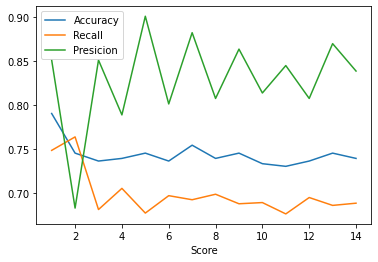

In [ ]:
plt.plot(scores['k'], scores['accuracy'], label='Accuracy')
plt.plot(scores['k'], scores['recall'], label='Recall')
plt.plot(scores['k'], scores['presicion'], label='Presicion')
plt.xlabel('K')
plt.xlabel('Score')
plt.legend()